In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [ ]:
df = pd.read_csv('Customer_Churn.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.describe(include='O').T

# ?????

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.drop('customerID', axis=1, inplace=True)
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [ ]:
df.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for column in binary_columns:
    df[column] = df[column].map({'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1})

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
print(df.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 2})
#######################
df['InternetService'] = df['InternetService'].map({'No': 0, 'Fiber optic': 1, 'DSL': 2})

In [ ]:
three_level_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies']
for column in three_level_columns:
    df[column] = df[column].map({'No': 1, 'Yes': 0, 'No internet service': 2})

In [ ]:
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

In [ ]:
df['PaymentMethod'] = df['PaymentMethod'].map({
    'Electronic check': 0,
    'Mailed check': 1,
    'Bank transfer (automatic)': 2,
    'Credit card (automatic)': 3
})

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,2,1,0,1,1,1,1,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,2,0,1,0,1,1,1,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,2,0,0,1,1,1,1,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,2,0,1,0,0,1,1,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,1,1,1,1,1,1,0,1,0,70.70,151.65,1


In [ ]:
print(df.describe())


            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7043.000000    7043.000000      7043.000000     7043.000000   
mean       0.903166       0.615505         1.127077        0.930001   
std        0.295752       0.656039         0.737796        0.706051   
min        0.000000       0.000

In [ ]:
#EDA

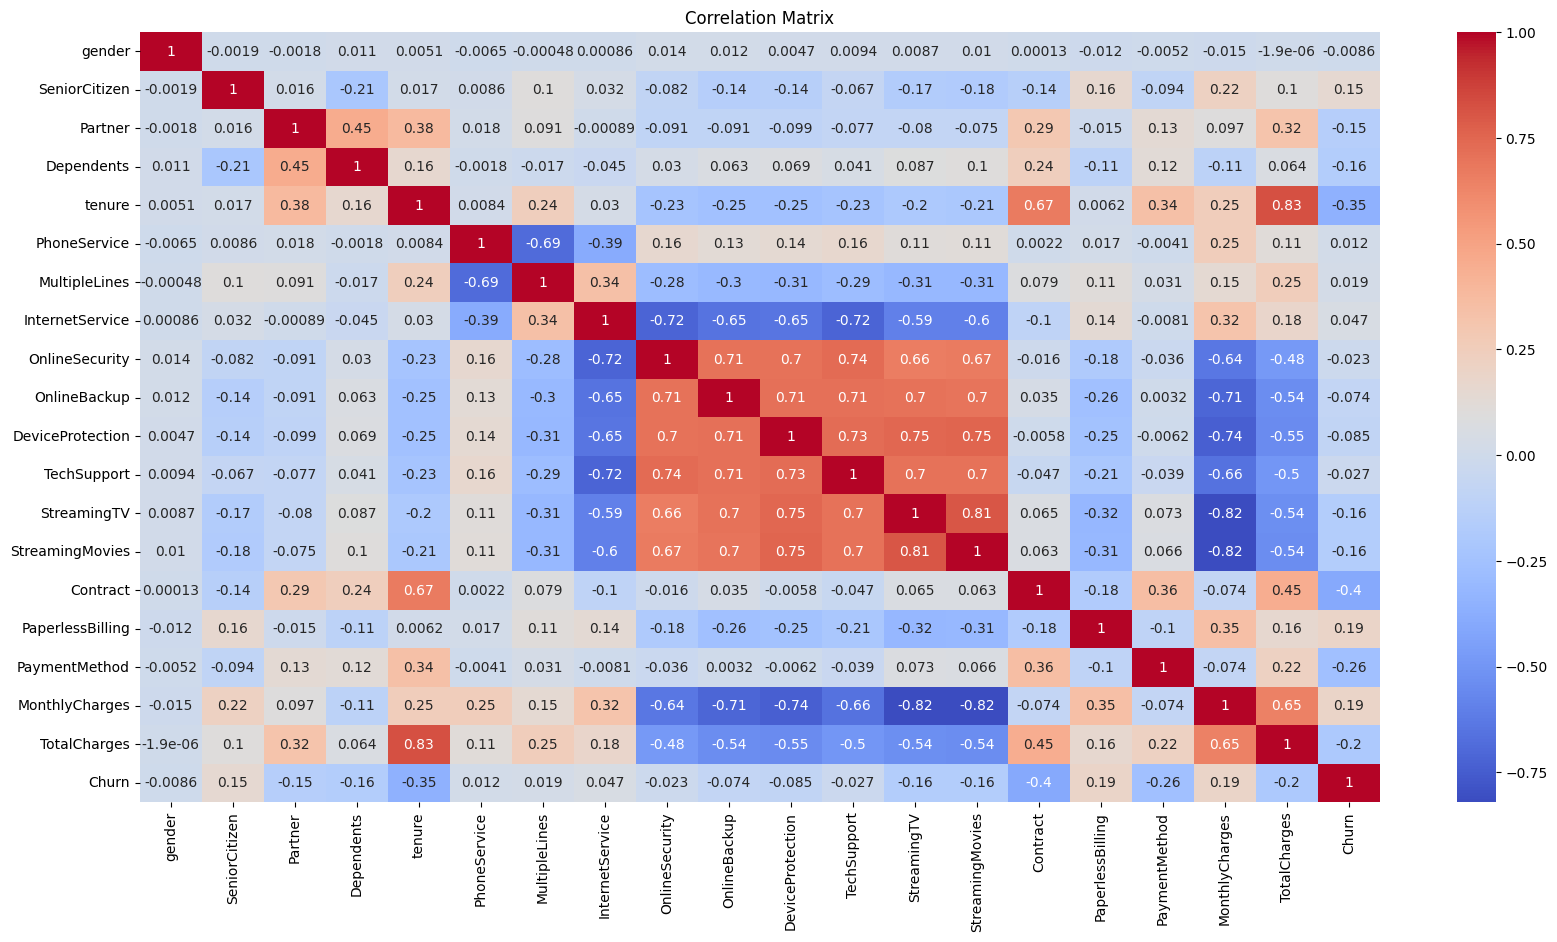

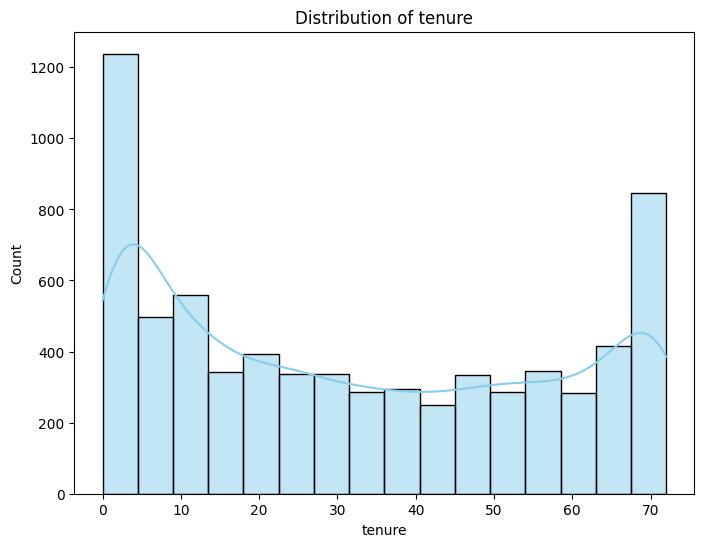

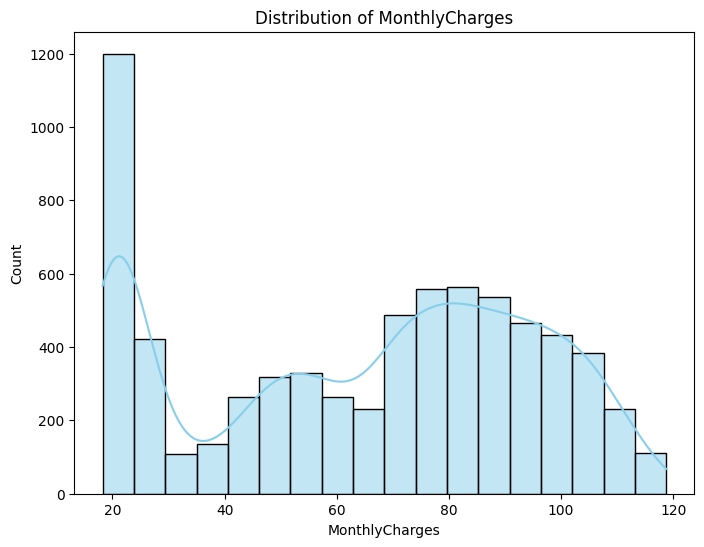

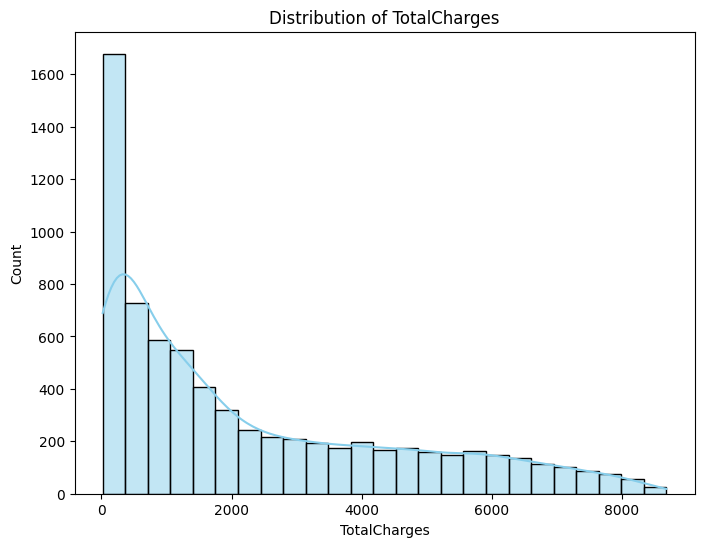

<ipython-input-4345-8aa480019c63>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




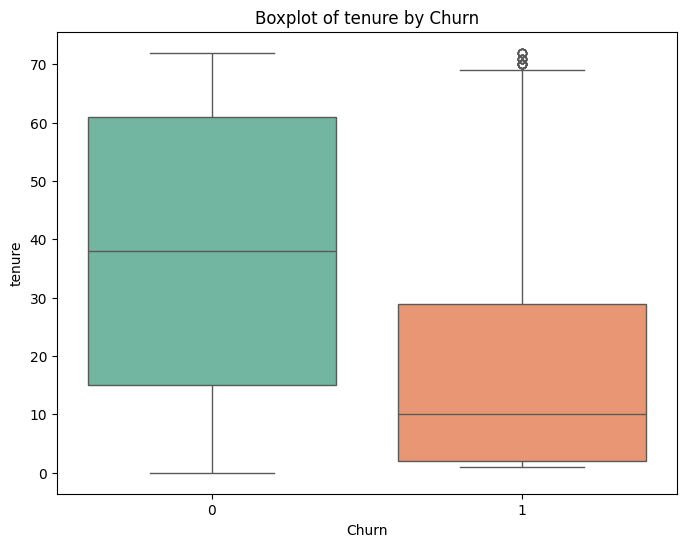

<ipython-input-4345-8aa480019c63>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




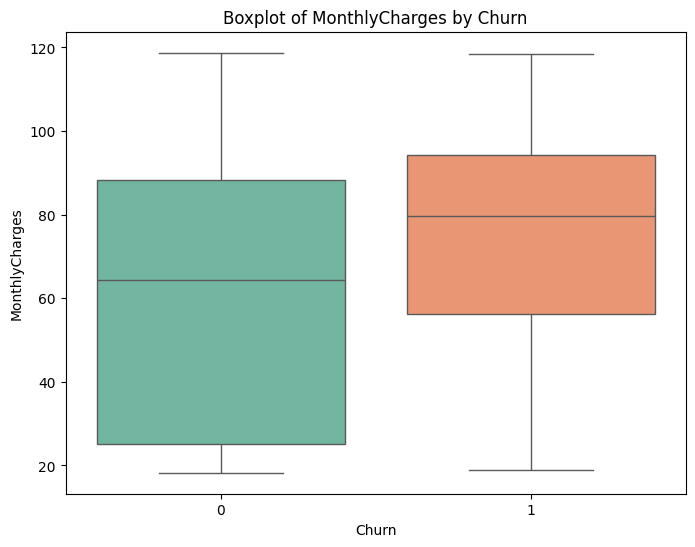

<ipython-input-4345-8aa480019c63>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




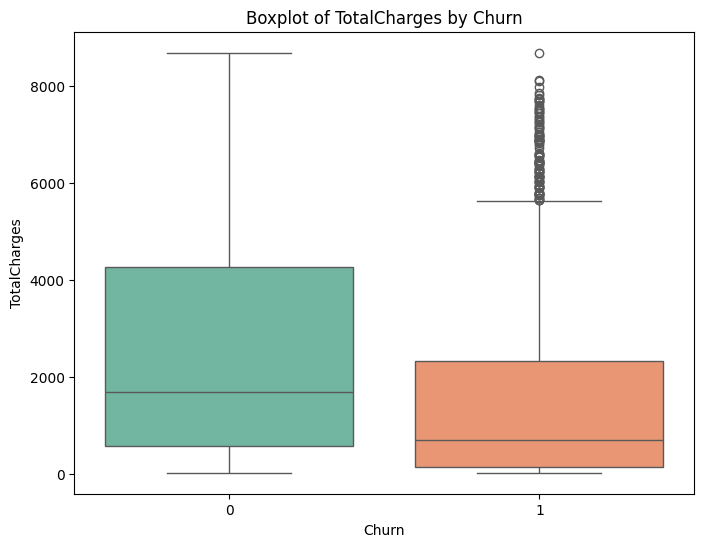

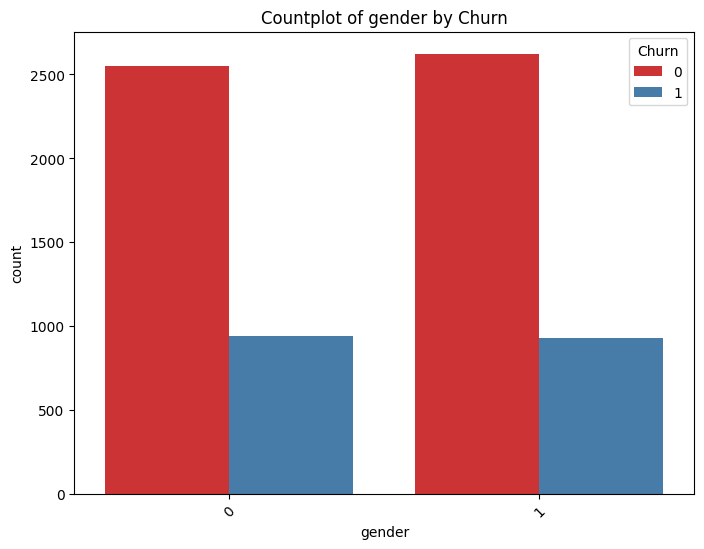

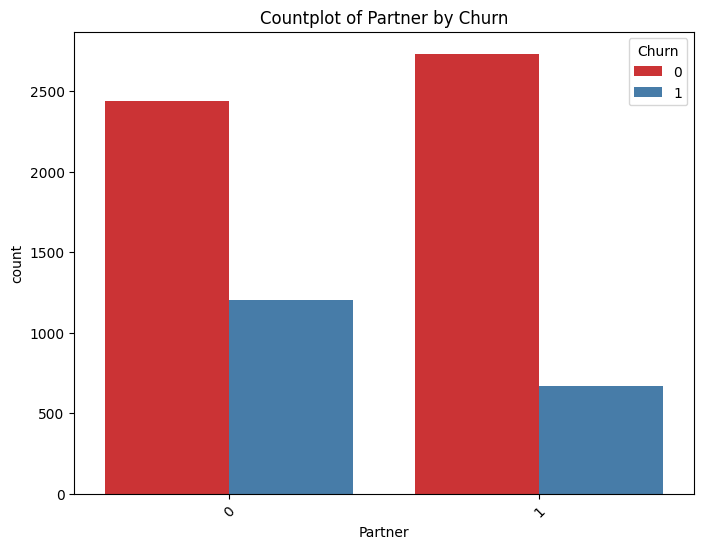

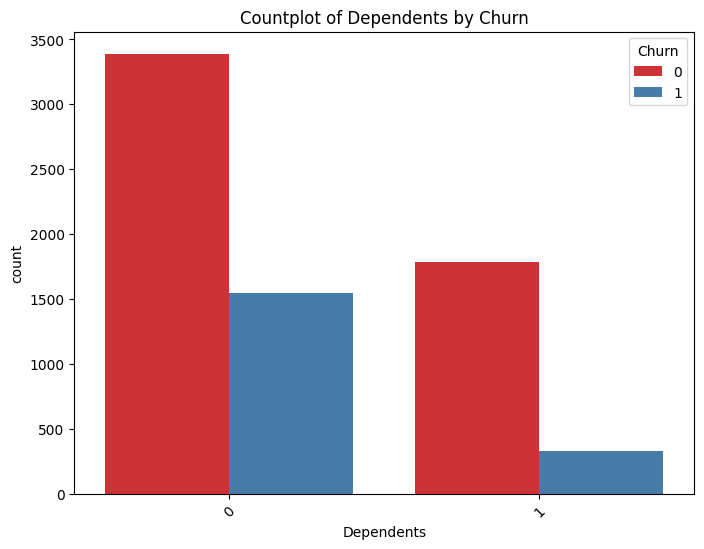

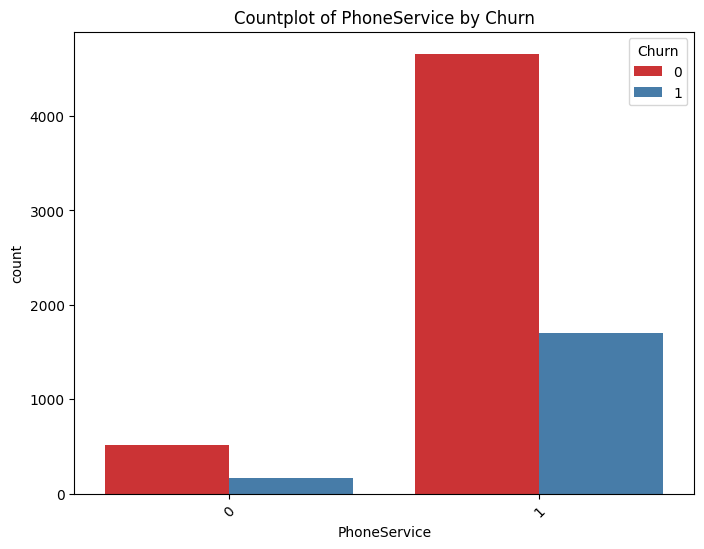

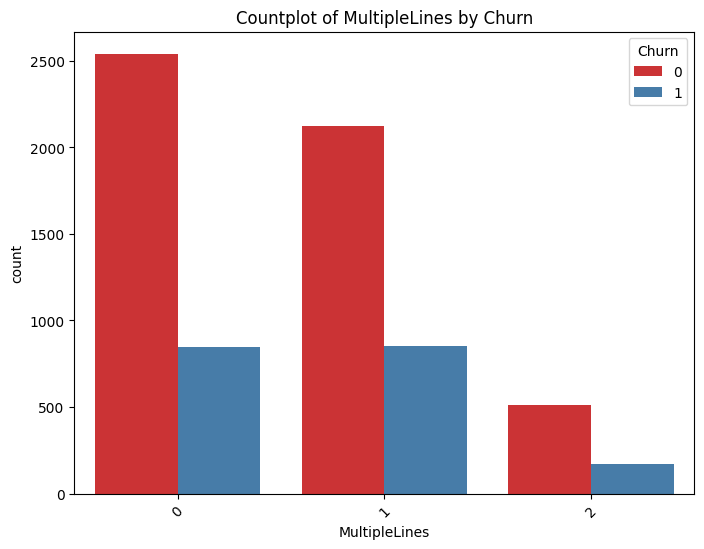

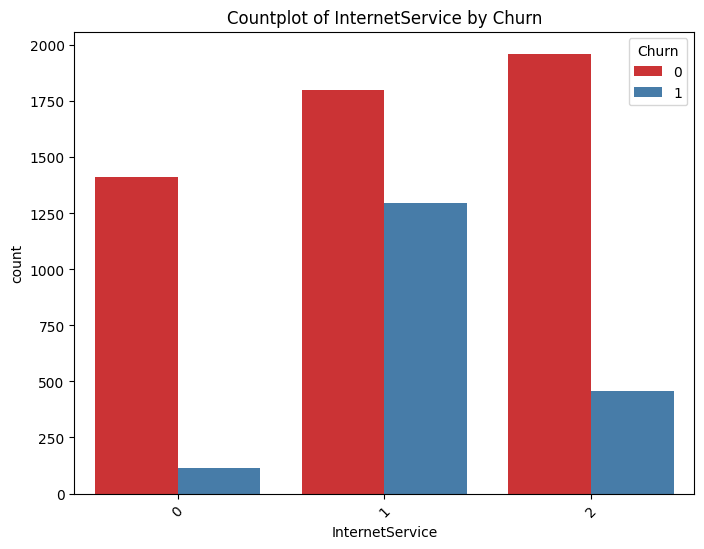

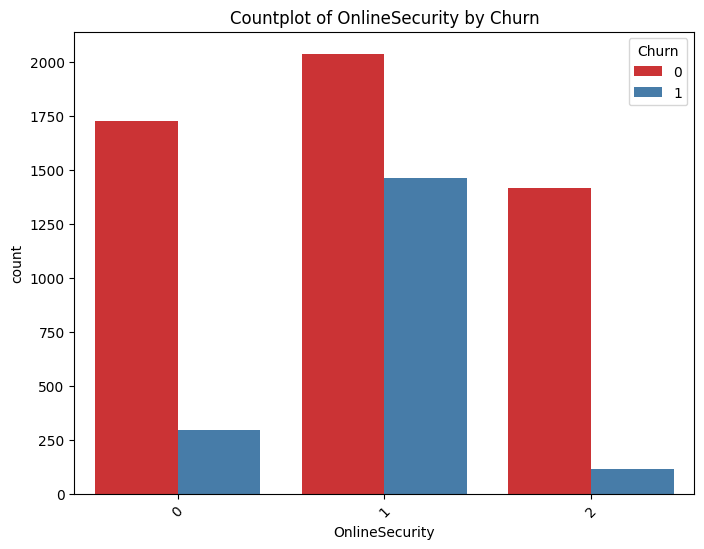

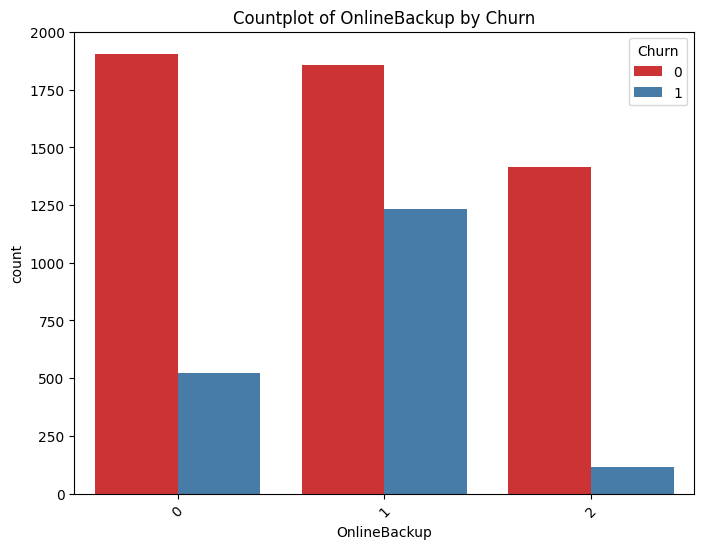

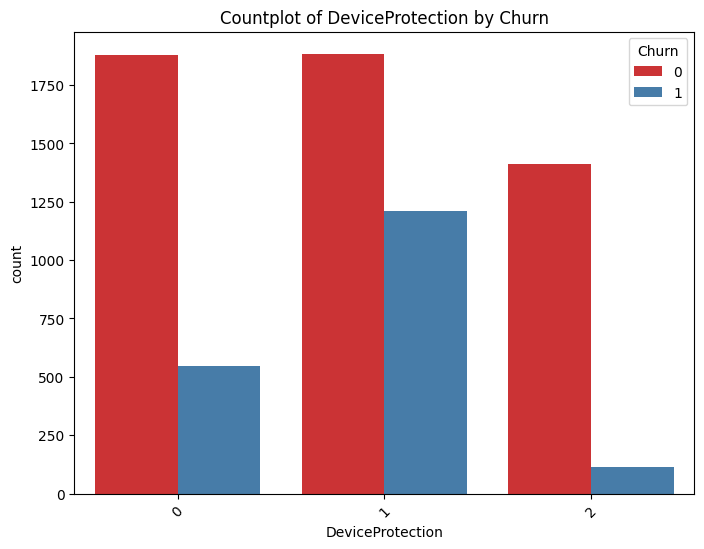

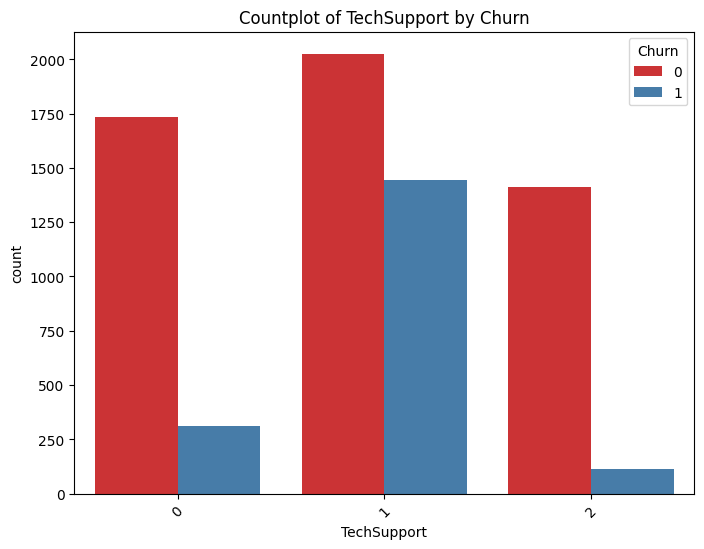

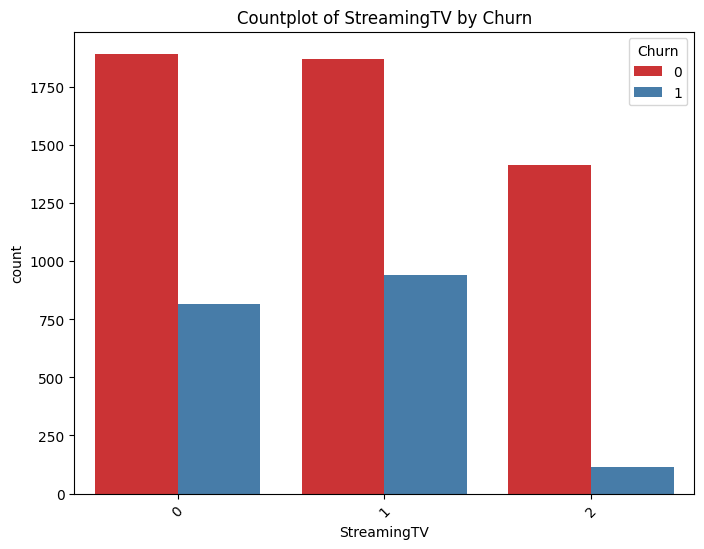

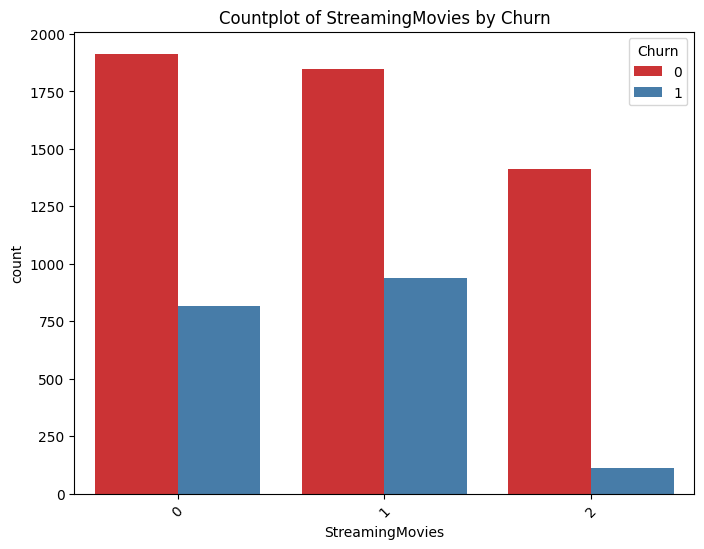

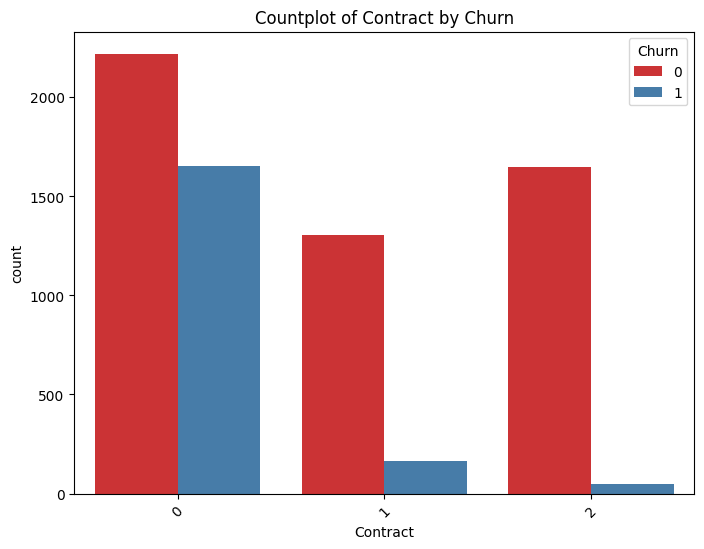

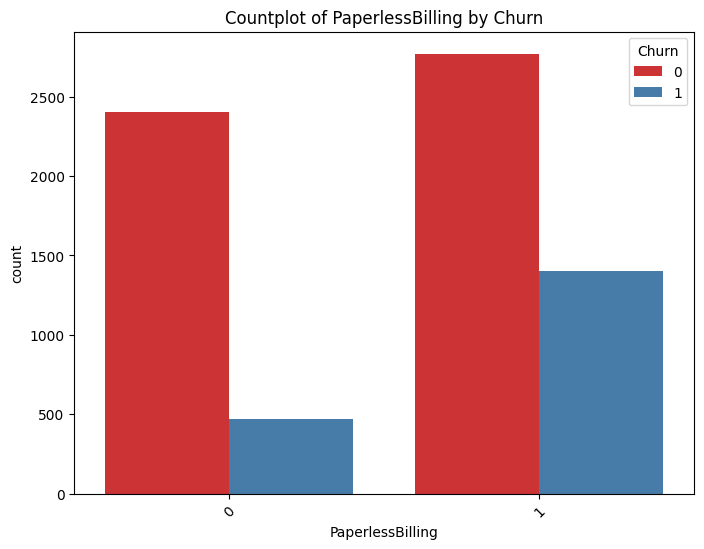

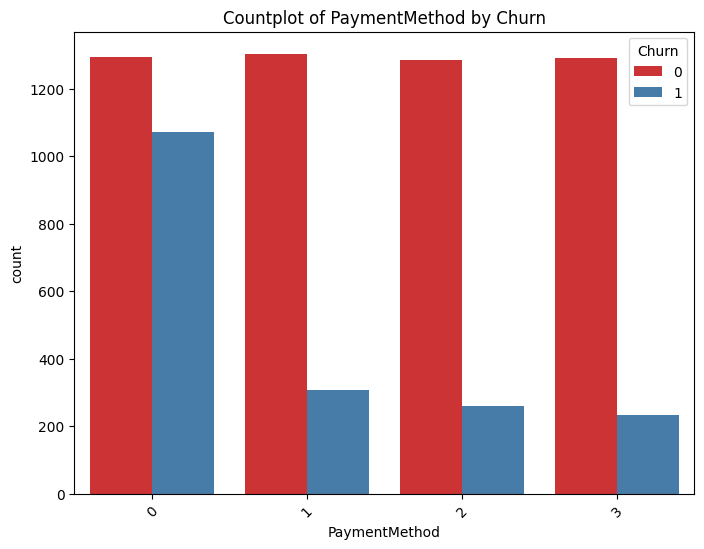

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')




plt.figure(figsize=(20, 10))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.show()


for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=feature, data=df , palette='Set2' )
    plt.title(f'Boxplot of {feature} by Churn')
    plt.show()

categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Churn', data=df, palette='Set1')
    plt.title(f'Countplot of {feature} by Churn')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
#نسبة العملاء يلي انسحبوا حسب عدد الاشهر
tenure_churn =df[df['tenure'] <= 5].Churn.mean()
tenure_churn

0.5426695842450766

In [ ]:
tenure_churn2= df[(df.tenure >= 5)].Churn.mean()
tenure_churn2
#اذن يلي صارلهم فترة اطول نسبة انسحابهم اقل

0.20482342807924203

In [ ]:
#MonthlyCharges
mc1 =df[df['MonthlyCharges'] <= 50].Churn.mean()
mc1

0.15702479338842976

In [ ]:
mc2 =df[df['MonthlyCharges'] > 50].Churn.mean()
mc2

0.3178752107925801

In [ ]:
tc1 = df[df['TotalCharges'] <= 1000].Churn.mean()
tc1

0.36985827860352577

In [ ]:
tc1 = df[df['TotalCharges'] > 1000].Churn.mean()
tc1

0.19253012048192772

In [ ]:
#----------------------feature engineering-----------------

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])
# Check correlation with target variable (Churn)
correlation_with_churn = df.corr()['Churn'].sort_values(ascending=False)
print("\nCorrelation with Churn:\n", correlation_with_churn)


Correlation with Churn:
 Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
InternetService     0.047291
MultipleLines       0.019423
PhoneService        0.011942
gender             -0.008612
OnlineSecurity     -0.023309
TechSupport        -0.027037
OnlineBackup       -0.074205
DeviceProtection   -0.084654
Partner            -0.150448
StreamingMovies    -0.163220
Dependents         -0.164221
StreamingTV        -0.164673
TotalCharges       -0.199037
PaymentMethod      -0.262818
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


In [ ]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,2,1,0,1,1,1,1,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,2,0,1,0,1,1,1,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,2,0,0,1,1,1,1,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,2,0,1,0,0,1,1,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,1,1,1,1,1,1,0,1,0,70.70,151.65,1
5,0,0,0,0,8,1,1,1,1,1,0,1,0,0,0,1,0,99.65,820.50,1
6,1,0,0,1,22,1,1,1,1,0,1,1,0,1,0,1,3,89.10,1949.40,0
7,0,0,0,0,10,0,2,2,0,1,1,1,1,1,0,0,1,29.75,301.90,0
8,0,0,1,0,28,1,1,1,1,1,0,0,0,0,0,1,0,104.80,3046.05,1
9,1,0,0,1,62,1,0,2,0,0,1,1,1,1,1,0,2,56.15,3487.95,0


In [ ]:
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
contract_churn_rates = df.groupby('Contract')['Churn'].mean()
print(contract_churn_rates)

Contract
0    0.427097
1    0.112695
2    0.028319
Name: Churn, dtype: float64


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_copy = df.copy()
fig1 = px.pie(df_copy, names='Churn', title='Churn Distribution')


df_copy['tenure_group'] = pd.cut(df_copy['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-12', '12-24', '24-48', '48-60', '60-72'], include_lowest=True)

churn_rate_by_tenure = df_copy.groupby('tenure_group', observed=True)['Churn'].mean().reset_index()
fig2 = px.bar(churn_rate_by_tenure, x='tenure_group', y='Churn', title='Churn Rate by Tenure Group')

df_copy['monthly_charges_group'] = pd.cut(df_copy['MonthlyCharges'], bins=[18.25, 50.0, 80.0, 100.0, 118.75],
                                          labels=['Low', 'Medium', 'High', 'Very High'], include_lowest=True)
churn_rate_by_monthly_charges = df_copy.groupby('monthly_charges_group', observed=True)['Churn'].mean().reset_index()
fig3 = px.bar(churn_rate_by_monthly_charges, x='monthly_charges_group', y='Churn', title='Churn Rate by Monthly Charges Group')

# fig4 = px.bar(df_copy, x='Churn', y='MonthlyCharges', title='Churn vs Monthly Charges', color='Churn')

fig = make_subplots(rows=2, cols=2,
                    specs=[[{'type': 'domain'}, {'type': 'xy'}],
                           [{'type': 'xy'}, {'type': 'xy'}]],
                    subplot_titles=('Churn Distribution', 'Churn Rate by Tenure Group',
                                    'Churn Rate by Monthly Charges Group'))

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=2, col=1)
# fig.add_trace(fig4.data[0], row=2, col=2)

fig.update_layout(title_text="Customer Churn Dashboard", height=800)
fig.show()



In [ ]:
df['OnlineSecurity_ChurnInteraction'] = df['OnlineSecurity'] * df['Churn']

df['TechSupport_ChurnInteraction'] = df['TechSupport'] * df['Churn']
print(df[['TechSupport', 'Churn', 'TechSupport_ChurnInteraction']].corr())

                              TechSupport     Churn  \
TechSupport                      1.000000 -0.027037   
Churn                           -0.027037  1.000000   
TechSupport_ChurnInteraction     0.151561  0.855590   

                              TechSupport_ChurnInteraction  
TechSupport                                       0.151561  
Churn                                             0.855590  
TechSupport_ChurnInteraction                      1.000000  


<ipython-input-4360-ecfe9fea1e3d>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




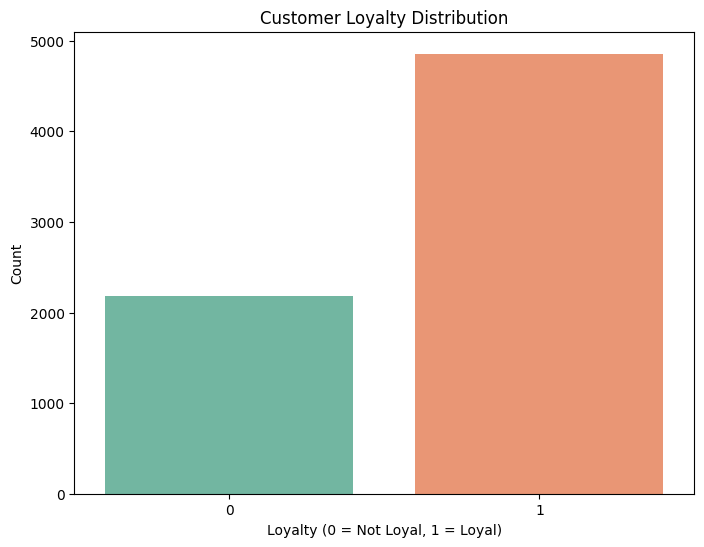

In [ ]:
df['loyalty_tenure'] = df['tenure'].apply(lambda x: 1 if x > 12 else 0)  # Loyal if tenure > 12 months
df['loyalty'] = (df['tenure'] > 12).astype(int)

plt.figure(figsize=(8, 6))
sns.countplot(x='loyalty', data=df, palette='Set2')
plt.title('Customer Loyalty Distribution')
plt.xlabel('Loyalty (0 = Not Loyal, 1 = Loyal)')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
for col in categorical_features:
   correlation_with_churn = df.corr()['Churn'].sort_values(ascending=False)
print("\nCorrelation with Churn:\n", correlation_with_churn)


Correlation with Churn:
 Churn                              1.000000
OnlineSecurity_ChurnInteraction    0.861018
TechSupport_ChurnInteraction       0.855590
MonthlyCharges                     0.193356
PaperlessBilling                   0.191825
SeniorCitizen                      0.150889
InternetService                    0.047291
MultipleLines                      0.019423
PhoneService                       0.011942
gender                            -0.008612
OnlineSecurity                    -0.023309
TechSupport                       -0.027037
OnlineBackup                      -0.074205
DeviceProtection                  -0.084654
Partner                           -0.150448
StreamingMovies                   -0.163220
Dependents                        -0.164221
StreamingTV                       -0.164673
TotalCharges                      -0.199037
PaymentMethod                     -0.262818
loyalty_tenure                    -0.317580
loyalty                           -0.317580
tenure

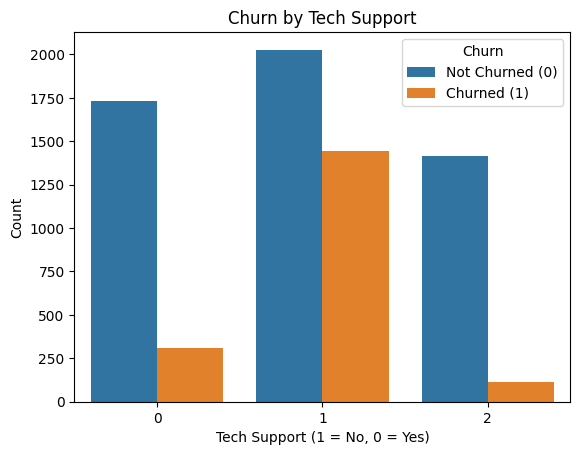

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Churn by Tech Support')
plt.xlabel('Tech Support (1 = No, 0 = Yes)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churned (0)', 'Churned (1)'])
plt.show()


In [ ]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_ChurnInteraction,TechSupport_ChurnInteraction,loyalty_tenure,loyalty
0,0,0,1,0,1,0,2,2,1,0,...,0,1,0,29.85,29.85,0,0,0,0,0
1,1,0,0,0,34,1,0,2,0,1,...,1,0,1,56.95,1889.50,0,0,0,1,1
2,1,0,0,0,2,1,0,2,0,0,...,0,1,1,53.85,108.15,1,0,1,0,0
3,1,0,0,0,45,0,2,2,0,1,...,1,0,2,42.30,1840.75,0,0,0,1,1
4,0,0,0,0,2,1,0,1,1,1,...,0,1,0,70.70,151.65,1,1,1,0,0
5,0,0,0,0,8,1,1,1,1,1,...,0,1,0,99.65,820.50,1,1,1,0,0
6,1,0,0,1,22,1,1,1,1,0,...,0,1,3,89.10,1949.40,0,0,0,1,1
7,0,0,0,0,10,0,2,2,0,1,...,0,0,1,29.75,301.90,0,0,0,0,0
8,0,0,1,0,28,1,1,1,1,1,...,0,1,0,104.80,3046.05,1,1,0,1,1
9,1,0,0,1,62,1,0,2,0,0,...,1,0,2,56.15,3487.95,0,0,0,1,1


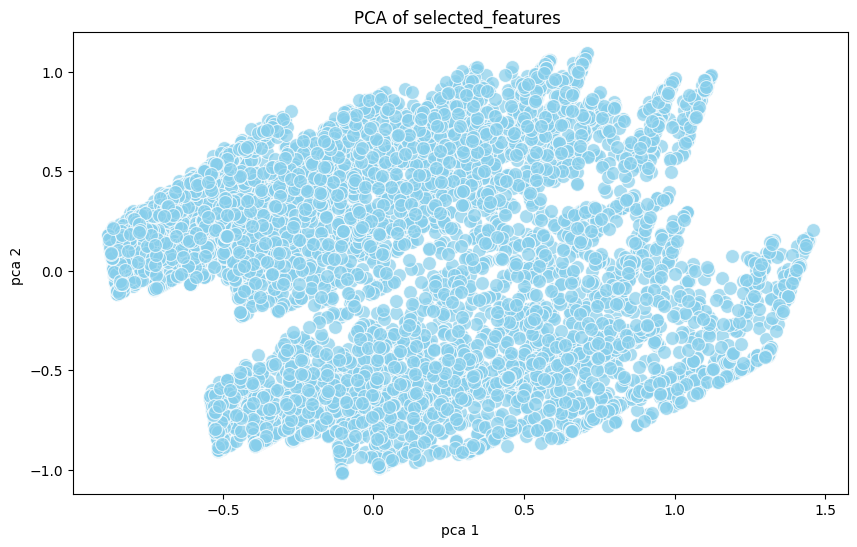

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


selected_features = ['Contract', 'tenure', 'PaymentMethod', 'TotalCharges',  'MonthlyCharges', 'PaperlessBilling', 'Dependents']

features = df[selected_features]

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)


df[selected_features] = scaled_features


pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)


features_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])


plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=features_pca, color='skyblue', s=100, alpha=0.7)
plt.title('PCA of selected_features ')
plt.xlabel('pca 1')
plt.ylabel('pca 2 ')
plt.show()


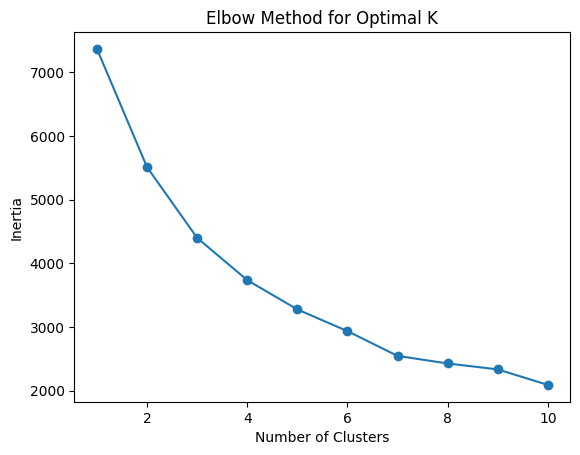

In [ ]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

<ipython-input-4366-ee445f4c1019>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-4366-ee445f4c1019>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



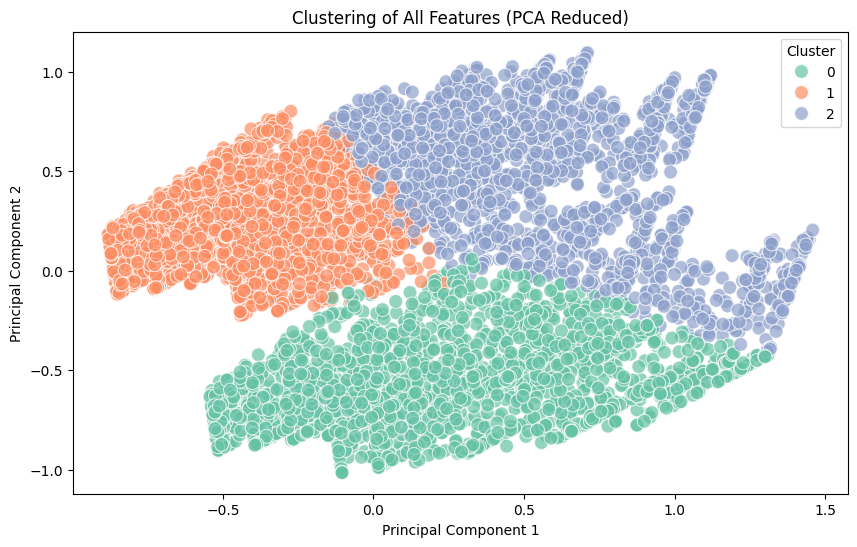

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans



kmeans = KMeans(n_clusters=3,  random_state=42).fit(features)
features.loc[:, 'cluster'] = kmeans.fit_predict(scaled_features)

features['cluster'] = kmeans.fit_predict(scaled_features)


pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)


features_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
features_pca['cluster'] = kmeans.labels_


plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=features_pca, hue='cluster', palette='Set2', s=100, alpha=0.7)
plt.title('Clustering of All Features (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Cluster Centroids:
   Contract    tenure  PaymentMethod  TotalCharges  MonthlyCharges  \
0  0.358260  0.375345       0.445736      0.144612        0.284865   
1  0.051906  0.267660       0.282759      0.166633        0.519522   
2  0.777592  0.832226       0.667781      0.568302        0.623068   

   PaperlessBilling  Dependents  Cluster  
0          0.000000    0.338813        0  
1          1.000000    0.160073        1  
2          0.789298    0.459309        2  


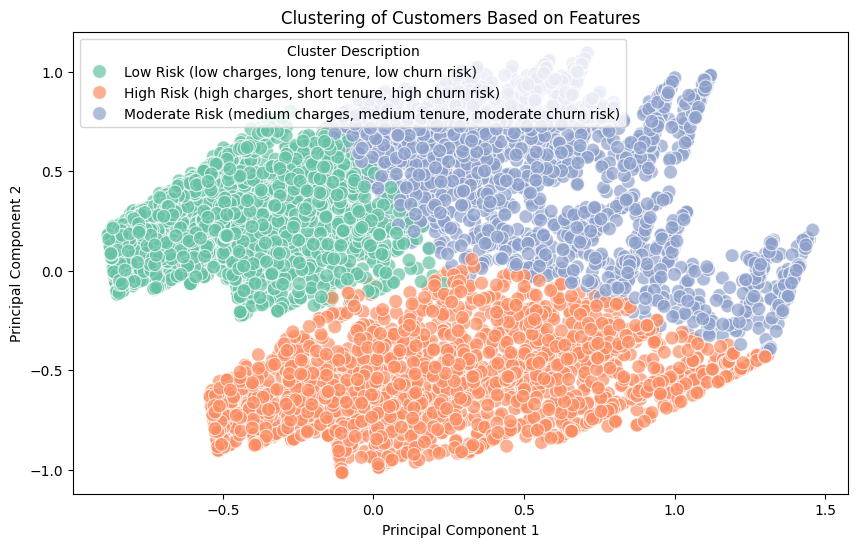


Cluster Centroids Analysis:
   Contract    tenure  PaymentMethod  TotalCharges  MonthlyCharges  \
0  0.358260  0.375345       0.445736      0.144612        0.284865   
1  0.051906  0.267660       0.282759      0.166633        0.519522   
2  0.777592  0.832226       0.667781      0.568302        0.623068   

   PaperlessBilling  Dependents  Cluster  
0          0.000000    0.338813        0  
1          1.000000    0.160073        1  
2          0.789298    0.459309        2  


In [ ]:

df_copy = df.copy()


selected_features = ['Contract', 'tenure', 'PaymentMethod', 'TotalCharges',
    'MonthlyCharges', 'PaperlessBilling', 'Dependents'
]


features_only = df_copy[selected_features]


kmeans = KMeans(n_clusters=3, random_state=42)
df_copy['cluster'] = kmeans.fit_predict(features_only)


cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=selected_features)
cluster_centroids['Cluster'] = range(len(cluster_centroids))
print("Cluster Centroids:")
print(cluster_centroids)


cluster_descriptions = {
    0: 'High Risk (high charges, short tenure, high churn risk)',
    1: 'Low Risk (low charges, long tenure, low churn risk)',
    2: 'Moderate Risk (medium charges, medium tenure, moderate churn risk)'
}


df_copy['Cluster Description'] = df_copy['cluster'].map(cluster_descriptions)


pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(features_only), columns=['PC1', 'PC2'])


df_pca['Cluster'] = df_copy['cluster']
df_pca['Cluster Description'] = df_copy['Cluster Description']


plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', data=df_pca,
    hue='Cluster Description', palette='Set2', s=100, alpha=0.7
)
plt.title('Clustering of Customers Based on Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Description')
plt.show()


print("\nCluster Centroids Analysis:")
print(cluster_centroids)


Cross-Validation Accuracy Scores for Random Forest: [0.79414374 0.78793256 0.78970719 0.77018634 0.78063943]
Mean CV Accuracy: 0.7845218526054333
Random Forest Test Accuracy: 0.7913413768630234
Precision: 0.6379310344827587
Recall: 0.4946524064171123
F1 Score: 0.5572289156626506
ROC AUC: 0.6966015655273967
Confusion Matrix:
 [[930 105]
 [189 185]]
Accuracy: 0.7913


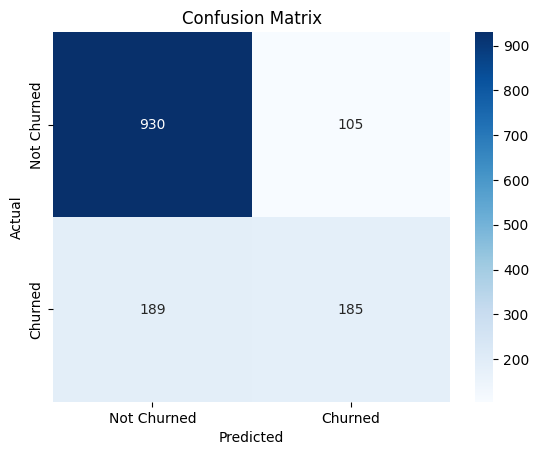

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
# print("Churn distribution:\n", df['Churn'].value_counts(normalize=True))

X = df .drop(['Churn', 'OnlineSecurity_ChurnInteraction', 'TechSupport_ChurnInteraction'], axis=1)
y = df ['Churn']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)


cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores for Random Forest:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

y_pred = rf_model.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()





In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)


knn_model.fit(X_train, y_train)

train_accuracy = knn_model.score(X_train, y_train)
print(f"Training Accuracy (KNN): {train_accuracy:.4f}")

test_accuracy = knn_model.score(X_test, y_test)
print(f"Testing Accuracy (KNN): {test_accuracy:.4f}")

Training Accuracy (KNN): 0.8408
Testing Accuracy (KNN): 0.7708


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_log))


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
from sklearn.svm import SVC
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

train_accuracy_svm_rbf = svm_model.score(X_train, y_train)
print(f"Training Accuracy (SVM with RBF Kernel): {train_accuracy_svm_rbf:.4f}")
y_pred_svm =  svm_model.predict(X_test)

test_accuracy_svm_rbf = svm_model.score(X_test, y_test)
print(f"Testing Accuracy (SVM with RBF Kernel): {test_accuracy_svm_rbf:.4f}")
print("SVM Report")
print(classification_report(y_test, y_pred_svm))

Training Accuracy (SVM with RBF Kernel): 0.8060
Testing Accuracy (SVM with RBF Kernel): 0.7857
SVM Report
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1035
           1       0.66      0.41      0.50       374

    accuracy                           0.79      1409
   macro avg       0.73      0.66      0.68      1409
weighted avg       0.77      0.79      0.77      1409



In [ ]:
df['TechSupport_ChurnInteraction'] = df['TechSupport'] * df['Churn']
df['OnlineSecurity_ChurnInteraction'] = df['OnlineSecurity'] * df['Churn']

print(df[['TechSupport', 'Churn', 'TechSupport_ChurnInteraction']].corr())

                              TechSupport     Churn  \
TechSupport                      1.000000 -0.027037   
Churn                           -0.027037  1.000000   
TechSupport_ChurnInteraction     0.151561  0.855590   

                              TechSupport_ChurnInteraction  
TechSupport                                       0.151561  
Churn                                             0.855590  
TechSupport_ChurnInteraction                      1.000000  


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, confusion_matrix
# from sklearn.model_selection import train_test_split

# from sklearn.model_selection import cross_val_score

In [ ]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)


knn_model.fit(X_train, y_train)

train_accuracy = knn_model.score(X_train, y_train)
print(f"Training Accuracy (KNN): {train_accuracy:.4f}")

test_accuracy = knn_model.score(X_test, y_test)
print(f"Testing Accuracy (KNN): {test_accuracy:.4f}")

Training Accuracy (KNN): 0.9769
Testing Accuracy (KNN): 0.9702


In [ ]:
# df['TechSupport_ChurnInteraction'] = df['TechSupport'] * df['Churn']
# df['OnlineSecurity_ChurnInteraction'] = df['OnlineSecurity'] * df['Churn']

# print(df[['TechSupport', 'Churn', 'TechSupport_ChurnInteraction']].corr())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_log))


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1036
           1       1.00      0.95      0.97       373

    accuracy                           0.99      1409
   macro avg       0.99      0.97      0.98      1409
weighted avg       0.99      0.99      0.99      1409



In [ ]:
from sklearn.svm import SVC
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

train_accuracy_svm_rbf = svm_model.score(X_train, y_train)
print(f"Training Accuracy (SVM with RBF Kernel): {train_accuracy_svm_rbf:.4f}")
y_pred_svm =  svm_model.predict(X_test)

test_accuracy_svm_rbf = svm_model.score(X_test, y_test)
print(f"Testing Accuracy (SVM with RBF Kernel): {test_accuracy_svm_rbf:.4f}")
print("SVM Report")
print(classification_report(y_test, y_pred_svm))


Training Accuracy (SVM with RBF Kernel): 0.9860
Testing Accuracy (SVM with RBF Kernel): 0.9858
SVM Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1036
           1       1.00      0.95      0.97       373

    accuracy                           0.99      1409
   macro avg       0.99      0.97      0.98      1409
weighted avg       0.99      0.99      0.99      1409



Churn distribution:
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64
Training set size: 4577
Validation set size: 1057
Test set size: 1409
Cross-Validation Accuracy Scores for Random Forest: [0.98253275 0.98689956 0.99016393 0.98032787 0.98907104]
Mean CV Accuracy: 0.9857990311881071

Random Forest Test Performance:
Accuracy: 0.9843860894251242
Precision: 1.0
Recall: 0.9411764705882353
F1 Score: 0.9696969696969697
ROC AUC: 0.9705882352941176
Confusion Matrix:
 [[1035    0]
 [  22  352]]
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8053 - loss: 0.4070 - val_accuracy: 0.9773 - val_loss: 0.0803
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9850 - loss: 0.0702 - val_accuracy: 0.9868 - val_loss: 0.0428
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9862 - loss: 0.0503 - val_accuracy: 0.9868 - val_loss: 0.0386
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9867 - loss: 0.0435 - val_accuracy: 0.9877 - val_loss: 0.0352
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9868 - loss: 0.0423 - val_accuracy: 0.9877 - val_loss: 0.0341
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0368 - val_accuracy: 0.9868 - val_loss: 0.0369
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9861 - loss: 0.0402 - val_accuracy: 0.9886 - val_loss: 0.0345
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9875 - loss: 0.0398 - val_accuracy: 0.9877 - val_

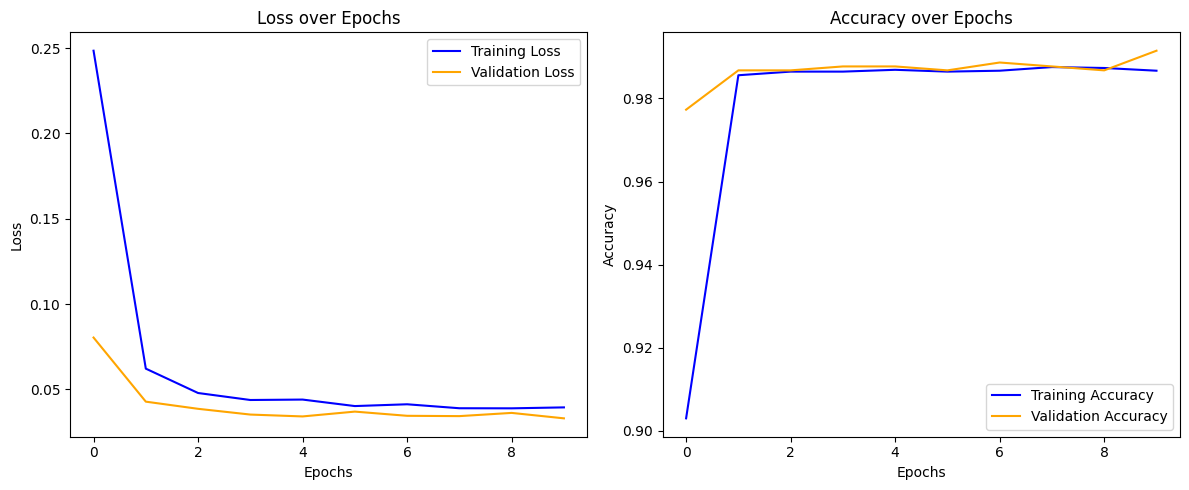


Neural Network Test Performance:
Loss: 0.0470, Accuracy: 0.9823


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

print("Churn distribution:\n", df['Churn'].value_counts(normalize=True))


X = df.drop(['Churn'], axis=1)
y = df['Churn']


X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.15 / 0.8, random_state=42, stratify=y_train_full
)


print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")




# ------------------ Random Forest Model ------------------
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)



cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores for Random Forest:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


y_test_pred = rf_model.predict(X_test)
print("\nRandom Forest Test Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# ------------------ Neural Network Model -------------------

nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss=BinaryCrossentropy(),
                 metrics=['accuracy'])


history = nn_model.fit(X_train, y_train,
                       validation_data=(X_val, y_val),
                       epochs=10,
                       batch_size=32)

def plot_training_validation_performance(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='orange')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy', color='blue')
    plt.plot(val_acc, label='Validation Accuracy', color='orange')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_validation_performance(history)


nn_test_loss, nn_test_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print("\nNeural Network Test Performance:")
print(f"Loss: {nn_test_loss:.4f}, Accuracy: {nn_test_accuracy:.4f}")


In [ ]:
selected_features = ['tenure', 'PhoneService', 'MultipleLines', 'InternetService',
                     'MonthlyCharges', 'TotalCharges']

X = df[selected_features]


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)


df['Cluster'] = kmeans.predict(X)

churn_rate_by_cluster = df.groupby('Cluster')['Churn'].mean()
print("Churn rate by cluster:")
print(churn_rate_by_cluster)


Churn rate by cluster:
Cluster
0    0.249267
1    0.282706
2    0.254042
Name: Churn, dtype: float64


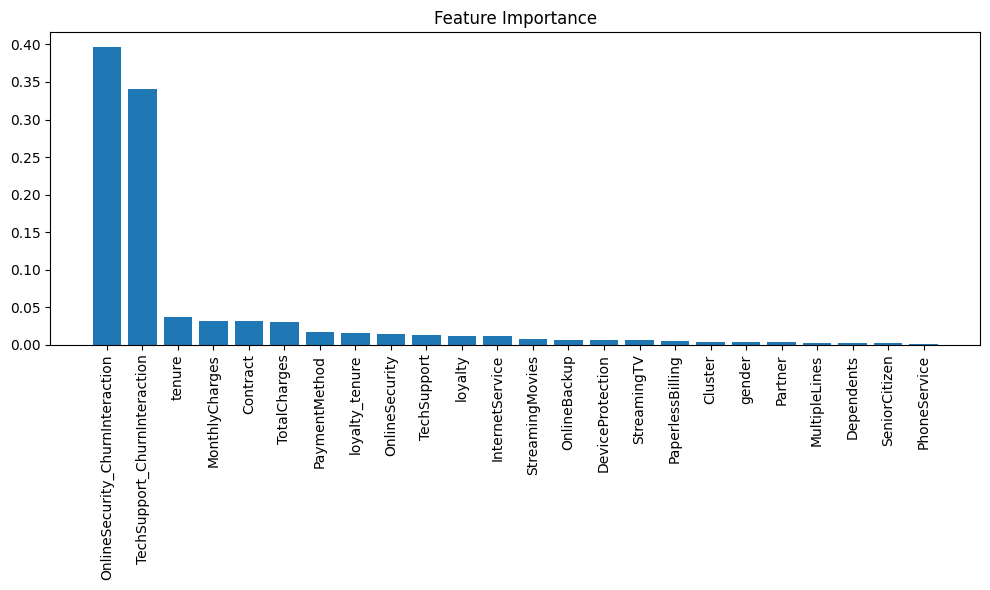

OnlineSecurity_ChurnInteraction: 0.3963
TechSupport_ChurnInteraction: 0.3403
tenure: 0.0372
MonthlyCharges: 0.0315
Contract: 0.0311
TotalCharges: 0.0302
PaymentMethod: 0.0165
loyalty_tenure: 0.0155
OnlineSecurity: 0.0143
TechSupport: 0.0136
loyalty: 0.0122
InternetService: 0.0113
StreamingMovies: 0.0071
OnlineBackup: 0.0068
DeviceProtection: 0.0060
StreamingTV: 0.0059
PaperlessBilling: 0.0044
Cluster: 0.0039
gender: 0.0039
Partner: 0.0033
MultipleLines: 0.0029
Dependents: 0.0029
SeniorCitizen: 0.0023
PhoneService: 0.0005


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np


label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


X = df.drop(columns=['Churn'])
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


importances = rf.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


In [ ]:
# satisfaction_related_features = ['TechSupport', 'OnlineSecurity', 'InternetService']
# for feature in satisfaction_related_features:
#     churn_by_feature = df.groupby(feature)['Churn'].mean()
#     print(f"Churn Rate by {feature}:\n", churn_by_feature)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])
# Check correlation with target variable (Churn)
correlation_with_churn = df.corr()['Churn'].sort_values(ascending=False)
print("\nCorrelation with Churn:\n", correlation_with_churn)


Correlation with Churn:
 Churn                              1.000000
OnlineSecurity_ChurnInteraction    0.861018
TechSupport_ChurnInteraction       0.855590
MonthlyCharges                     0.193356
PaperlessBilling                   0.191825
SeniorCitizen                      0.150889
InternetService                    0.047291
MultipleLines                      0.019423
PhoneService                       0.011942
gender                            -0.008612
Cluster                           -0.013816
OnlineSecurity                    -0.023309
TechSupport                       -0.027037
OnlineBackup                      -0.074205
DeviceProtection                  -0.084654
Partner                           -0.150448
StreamingMovies                   -0.163220
Dependents                        -0.164221
StreamingTV                       -0.164673
TotalCharges                      -0.199037
PaymentMethod                     -0.262818
loyalty_tenure                    -0.317580
loyalt


**Solution to reduce customer churn**




In [ ]:
import pandas as pd

df['LoyaltyTier'] = pd.cut(df['tenure'],
                            bins=[0, 0.25, 0.75, 1.0],  # 0-3 months, 3-9 months, 9+ months
                            labels=['Silver', 'Gold', 'Platinum'])


df['loyalty_points'] = 0
df['exclusive_discount'] = 0


df.loc[df['LoyaltyTier'] == 'Silver', 'loyalty_points'] = 50
df.loc[df['LoyaltyTier'] == 'Silver', 'exclusive_discount'] = 0.05  # 5% discount for Silver

df.loc[df['LoyaltyTier'] == 'Gold', 'loyalty_points'] = 100
df.loc[df['LoyaltyTier'] == 'Gold', 'exclusive_discount'] = 0.10  # 10% discount for Gold

df.loc[df['LoyaltyTier'] == 'Platinum', 'loyalty_points'] = 200
df.loc[df['LoyaltyTier'] == 'Platinum', 'exclusive_discount'] = 0.15  # 15% discount for Platinum

print(df[['tenure', 'LoyaltyTier', 'loyalty_points', 'exclusive_discount']].head(30))


      tenure LoyaltyTier  loyalty_points  exclusive_discount
0   0.013889      Silver              50                0.05
1   0.472222        Gold             100                0.10
2   0.027778      Silver              50                0.05
3   0.625000        Gold             100                0.10
4   0.027778      Silver              50                0.05
5   0.111111      Silver              50                0.05
6   0.305556        Gold             100                0.10
7   0.138889      Silver              50                0.05
8   0.388889        Gold             100                0.10
9   0.861111    Platinum             200                0.15
10  0.180556      Silver              50                0.05
11  0.222222      Silver              50                0.05
12  0.805556    Platinum             200                0.15
13  0.680556        Gold             100                0.10
14  0.347222        Gold             100                0.10
15  0.958333    Platinum

<ipython-input-4386-b6c22dc8c039>:13: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.05' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [ ]:
product_improvement_customers = df[(df['TechSupport_ChurnInteraction'] == 1) | (df['OnlineSecurity_ChurnInteraction'] == 1)]
product_improvement_customers['service_upgrade'] = 'Upgrade Tech Support and Online Security'


service_training_customers = df[(df['TechSupport_ChurnInteraction'] == 1)]
service_training_customers['service_training_offer'] = 'Send proactive support offers  & trail samples '



family_customers = df[df['Dependents'] == 'Yes']
family_customers['personalized_message'] = 'Exclusive family plan offer'


df['pricing_offer'] = df.apply(
    lambda row: 'Offer Discount' if row['MonthlyCharges'] > 100 else 'No Discount', axis=1)


<ipython-input-4387-27cb488a64d0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-4387-27cb488a64d0>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



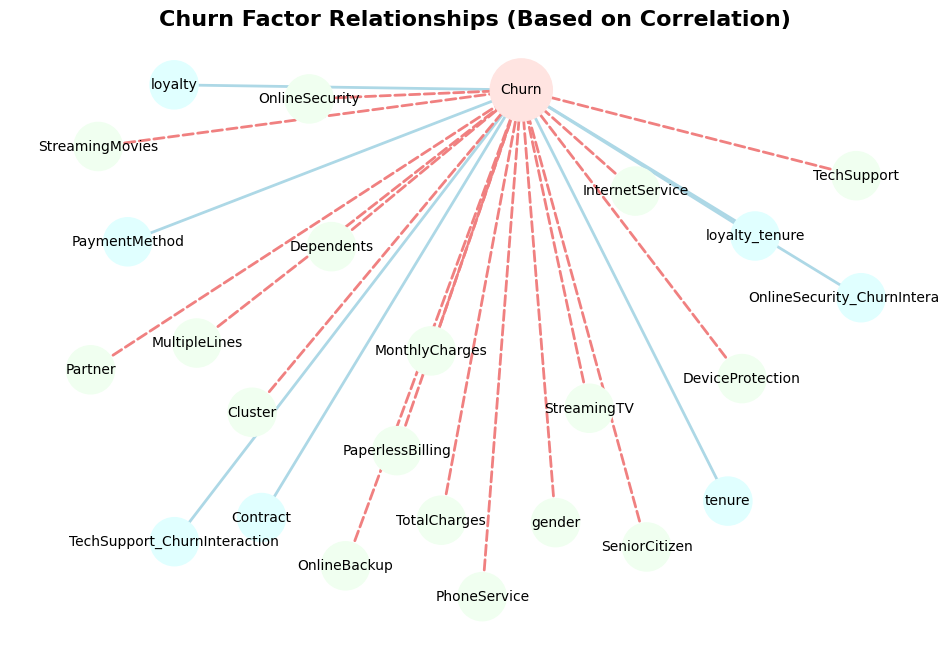

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


correlation_with_churn = {
    'OnlineSecurity_ChurnInteraction': 0.861018,
    'TechSupport_ChurnInteraction': 0.855590,
    'MonthlyCharges': 0.193356,
    'PaperlessBilling': 0.191825,
    'SeniorCitizen': 0.150889,
    'Cluster': 0.050333,
    'InternetService': 0.047291,
    'MultipleLines': 0.019423,
    'PhoneService': 0.011942,
    'gender': -0.008612,
    'OnlineSecurity': -0.023309,
    'TechSupport': -0.027037,
    'OnlineBackup': -0.074205,
    'DeviceProtection': -0.084654,
    'Partner': -0.150448,
    'StreamingMovies': -0.163220,
    'Dependents': -0.164221,
    'StreamingTV': -0.164673,
    'TotalCharges': -0.199037,
    'PaymentMethod': -0.262818,
    'loyalty_tenure': -0.317580,
    'loyalty': -0.317580,
    'tenure': -0.352229,
    'Contract': -0.396713,
}

direct_factors = [attr for attr, corr in correlation_with_churn.items() if abs(corr) >= 0.2]
indirect_factors = [attr for attr, corr in correlation_with_churn.items() if abs(corr) < 0.2]


G = nx.DiGraph()


G.add_node("Churn", color='mistyrose', size=2000)
for factor in direct_factors:
    G.add_node(factor, color='lightcyan', size=1200)
    G.add_edge(factor, "Churn", style="solid")

for factor in indirect_factors:
    G.add_node(factor, color='honeydew', size=1200)
    G.add_edge(factor, "Churn", style="dashed")


node_colors = [nx.get_node_attributes(G, 'color')[n] for n in G.nodes]
node_sizes = [nx.get_node_attributes(G, 'size')[n] for n in G.nodes]

edge_styles = nx.get_edge_attributes(G, 'style')
solid_edges = [edge for edge, style in edge_styles.items() if style == "solid"]
dashed_edges = [edge for edge, style in edge_styles.items() if style == "dashed"]


pos = nx.spring_layout(G, seed=42)


plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
nx.draw_networkx_edges(G, pos, edgelist=solid_edges, edge_color="lightblue", width=2, style="solid")
nx.draw_networkx_edges(G, pos, edgelist=dashed_edges, edge_color="lightcoral", width=2, style="dashed")


plt.title("Churn Factor Relationships (Based on Correlation)", fontsize=16, fontweight="bold")
plt.axis("off")
plt.show()


In [ ]:
def offer_a_or_b(row):
    if row['SeniorCitizen'] == 1:
        return "50% off on next bill"
    else:
        return " Bundle offer "

df['Offer_A_B'] = df.apply(offer_a_or_b, axis=1)


Measure  how many customers churned before and after sending personalized offers.

In [ ]:
# Calculate churn rate before (based on overall churn)
churn_rate_before = df[df['Churn'] == 1].shape[0] / df.shape[0]

# Calculate churn rate after (based on offer "Bundle offer with extra data")
offer_group = df[df['Offer_A_B'] == 'Bundle offer with extra data']

# Avoid division by zero if no customers received the offer
if offer_group.shape[0] > 0:
    churn_rate_after = offer_group[offer_group['Churn'] == 1].shape[0] / offer_group.shape[0]
else:
    churn_rate_after = 0  # or None, depending on how you want to handle it



We must take feedback from the customer to develop the service

In [ ]:
def feedback_request(row):
    if row['Churn'] == 1:
        return "  We're sorry to see you go! Please let us know how we can improve!!!  "
    else:
        return "  Thank you for being with us ! Please share your thoughts on our latest offer  "

df['Survey'] = df.apply(feedback_request, axis=1)

https://docs.google.com/forms/d/e/1FAIpQLSfd-pMjYGWWUQGJ8PaDvs_-IwYEjs7QGwkemdbJducZuVWVCg/viewform?usp=sf_link[link text](https://)